# Sales Estimation By Guram Keretchashvili

# Step 1 : Import Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Step 2 : Look at the data and Define dependent and Indipendent Variables

In [51]:
data = pd.read_csv("ads2.csv").iloc[ : , 1:] # omit first column
#indipendent
X = data.iloc[ : , :-1].values
#dependent
Y = data.iloc[:, 4].values
# X.shape (200,4) correct!
# Y.shape (200,1) correct!
data.head()

,Internet,TV,Press,News,Sales
0,460.2,75.6,138.4,69.2,22.1
1,89.0,78.6,90.2,45.1,10.4
2,34.4,91.8,138.6,69.3,9.3
3,303.0,82.6,117.0,58.5,18.5
4,361.6,21.6,116.8,58.4,12.9


# Step 3 : illustrate dependences of the variables on Sales

## let's use headmap

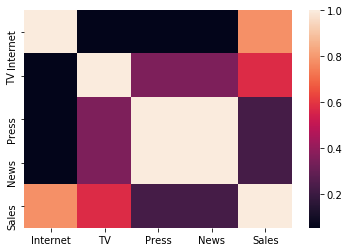

In [52]:
sns.heatmap(data.corr()) #deefines connections on variables

as we see in this map from the variables: Internet has the most connection to Sales than any others Followed by TV. less connection has sales and News investments

## Doublecheck heatmap connections with more illustrations

Text(0, 0.5, 'internet investment')

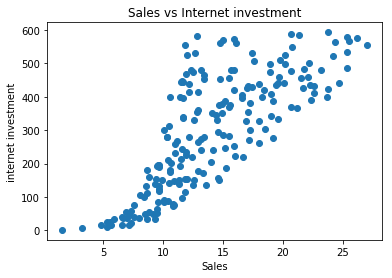

In [53]:
plt.scatter(data.Sales, data.Internet)
plt.title('Sales vs Internet investment')
plt.xlabel('Sales')
plt.ylabel('internet investment')

Invernet Vs Sales dependency seems really linear

Text(0, 0.5, 'TV investment')

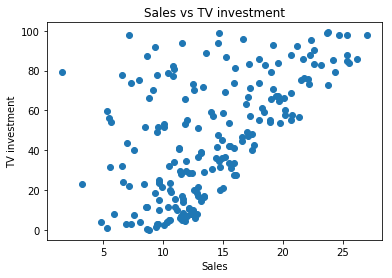

In [54]:
plt.scatter(data.Sales, data.TV)
plt.title('Sales vs TV investment')
plt.xlabel('Sales')
plt.ylabel('TV investment')

TV vs Sales depencency is less linear than Internet and Sales, but it is considered as linear as well

Text(0, 0.5, 'Press investment')

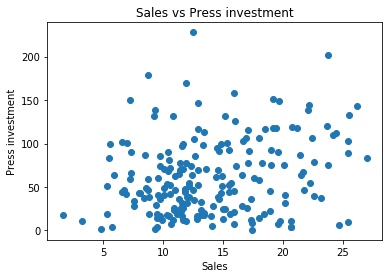

In [55]:
plt.scatter(data.Sales, data.Press)
plt.title('Sales vs Press investment')
plt.xlabel('Sales')
plt.ylabel('Press investment')

as expected Press vs Sales relationship is much less linear than investments in Internet and TV

Text(0, 0.5, 'News investment')

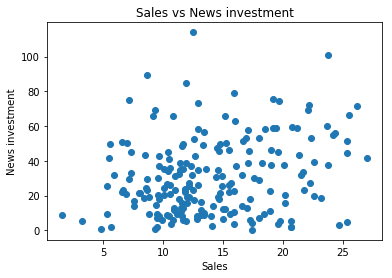

In [56]:
plt.scatter(data.Sales, data.News)
plt.title('Sales vs News investment')
plt.xlabel('Sales')
plt.ylabel('News investment')

as we expected News vs Sales relationship is also less linear than TV and Internet. It is noticable that this graph looks like Sales vs Press grahp but the difference is that investment in News is 2 times less than in Press

## Conclusion about variable relationships on sale :
 Heatmap illustration was confirmed with one by one dependencies, which gives us idea that analyzing is on the right path

# Step 4 : Divide data into train and test sets

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

# Step 5 : Fitting multiple linear regression model to training set

In [58]:
#fitting multiple linear regression model to training set 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train) # we fit all the data to linear regression model, here is hidden formulas

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
#predict test set results
Y_pred = regressor.predict(X_test)
Y_pred

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

# Step 6 : Calculate coefficients and intercept

In [60]:
#calculating the coefficents and intercepts
print(regressor.coef_)

[ 0.02229201  0.09824852 -0.00111259 -0.00055629]


In [61]:
print(regressor.intercept_)

2.9948930304953336


# Step 7 : Estimation of the result

In [62]:
#estiamte if this is valid model 
from sklearn.metrics import r2_score
#error
r2_score(Y_test, Y_pred)


0.8601145185017868

In [63]:
regressor.score(X_test,Y_test)

0.8601145185017868

# Conculsion: the accuracy is 86 %, which is really good for this amount of dataset

# Extra: We can boost Gradient Descent algorithm to get more accurate result

In [64]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [67]:
clf.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [68]:
clf.score(X_test,Y_test)

0.9714475584748739

### with boosted algorithm accuracy is 97%